<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
The Imput Layer is what recieves input from our dataset. Sometimes it is called the visible layer because it's the only part that is exposed to our data and that our data interacts with directly.  Typically node maps are drawn with one input node for each of the different inputs/features/columns of our dataset that will be passed to the network.

### Hidden Layer:
Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer.  They're inside of the network and they perfeorm their functions, but we don't directly interact with them.  The simplest possible network is to have a single neuron in the hidden layer that just outputs the value. "Deep Learning" is a big part of the renewed hype around ANNs because it allows networks that are structured in specific ways to accomplish tasks that were previously out of reach (image reconition for example).

### Output Layer:
The purpose of an output layer is to output a vecot of values that is in a format that is suitable for the type of problem  that we're trying to address. Typicaly the output value is modified by an "activation function" to transform it into a format that makes sense for our context. 

### Neuron:

### Weight:

### Activation Function:
In Neural Networks, each node has an activation function. Each node in a given layer typically has the same activation function. These activation functions are the biggest piece of neural networks that have been inspired by actual biology. The activation function decides whether a cell "fires" or not. Sometimes it is said that the cell is "activated" or not. In Artificial Neural Networks activation functions decide how much signal to pass onto the next layer. This is why they are sometimes referred to as transfer functions because they determine how much signals is transferred to the next layer. 

### Node Map:

### Perceptron:
The first and simplest kind of neural network is a perception. A perceptron is just a single node or neuron of a neural network with nothing else. It can take any number of inputs and spit out an output. What a neuron does is it takes each of the input values, multiplies each of them by a weight, sums all of these products up, and then passes the sum through what is called an "activation function" the result of which is the final value. 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [6]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [7]:
correct_outputs =  np.array(df[['y']])
correct_outputs

array([[1],
       [1],
       [1],
       [0]])

In [8]:
#couldnt convert array above
# correct_outputs = [[1], [1], [1], [0]]


In [12]:
inputs = np.array(df[['x1', 'x2']])
inputs

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivate(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [14]:
weights = 2 * np.random.random((2,1)) -1 
weights

array([[ 0.24271144],
       [-0.35848578]])

In [15]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 0.        ],
       [ 0.24271144],
       [-0.35848578],
       [-0.11577434]])

In [16]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivate(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 1.52655666e-16]
 [-3.05311332e-16]]
Output after training
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [17]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
diabetes.shape

(768, 9)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [31]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# X = diabetes.iloc[:, 0:8].values
# y = diabetes.iloc[:, -1:].values
features = list(diabetes)[:-1]
target = 'Outcome'

In [25]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
  
            
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)
       

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Initialize Weights
        self.weight = np.zeros(X.shape[1])
        self.bias = np.ones(1 + X.shape[0])
#         X = np.concatenate((X, self.bias), axis=1)
        
        # Number of misclassifications
        self.errors = []

        for i in range(self.niter):
            err = 0
            
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                # Activate
                self.weight[:] += delta_w * xi
                self.weight[0] += delta_w 
                #calculate error
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weight) 


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)

In [32]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(diabetes[features])
y = diabetes[target]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4545454)

In [57]:
from sklearn.metrics import accuracy_score

model = Perceptron()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y_pred, y_test)

In [58]:
accuracy

0.796875

In [55]:
y_pred

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [188]:
pn = Perceptron(0.1, 10)

In [189]:
pn.fit(X, y)

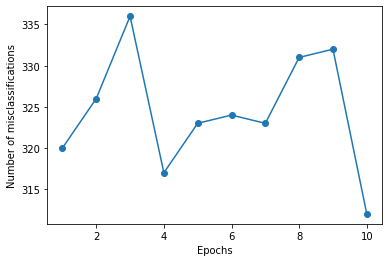

In [190]:
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?